In [ ]:
# Load the dataset in Python environment

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('/content/train_loan.csv')

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Perform different preprocessing steps
#a. Missing value handling
#b. Outlier detection
#c. Encoding
#d. Scaling

In [9]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

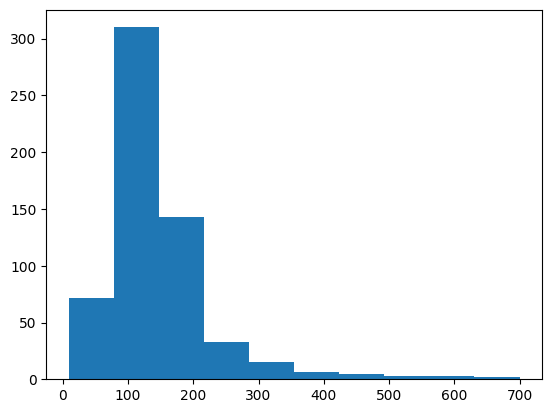

In [12]:
plt.hist(data['LoanAmount'])
plt.show()

In [13]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

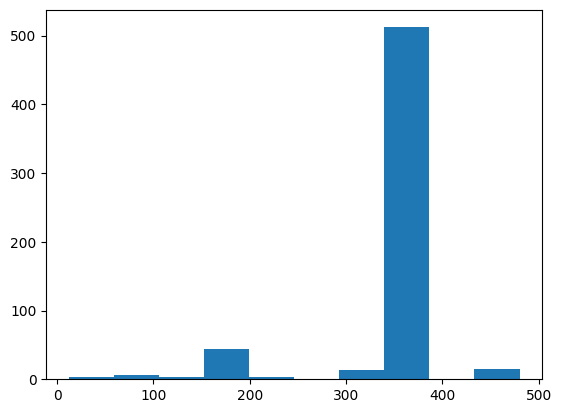

In [14]:
plt.hist(data['Loan_Amount_Term'])
plt.show()

In [15]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

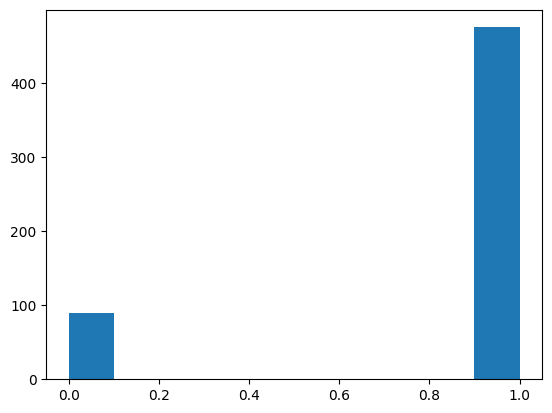

In [16]:
plt.hist(data['Credit_History'])
plt.show()

In [17]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [18]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [19]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
data['Self_Employed'].mode(0)

0    No
Name: Self_Employed, dtype: object

In [21]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [22]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [23]:
data['Dependents'].mode(0)

0    0
Name: Dependents, dtype: object

In [25]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [26]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
data['Married'].mode(0)

0    Yes
Name: Married, dtype: object

In [28]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [29]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [30]:
data['Gender'] = data['Gender'].fillna(data['Married'].mode()[0])

In [31]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#outlier detection

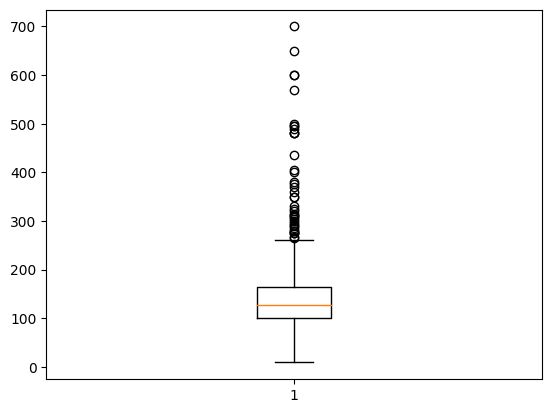

In [32]:
plt.boxplot(data['LoanAmount'])
plt.show()

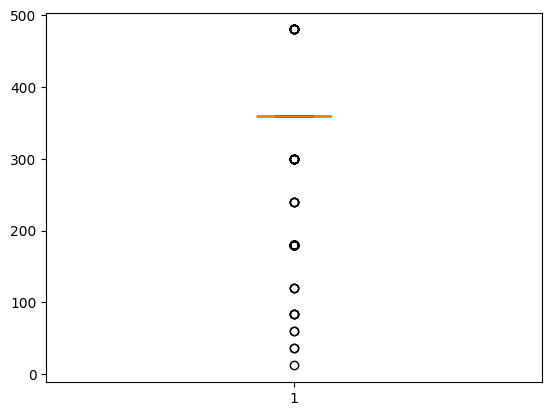

In [33]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

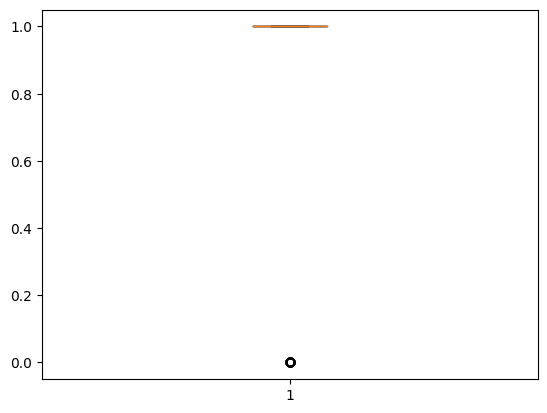

In [34]:
plt.boxplot(data['Credit_History'])
plt.show()

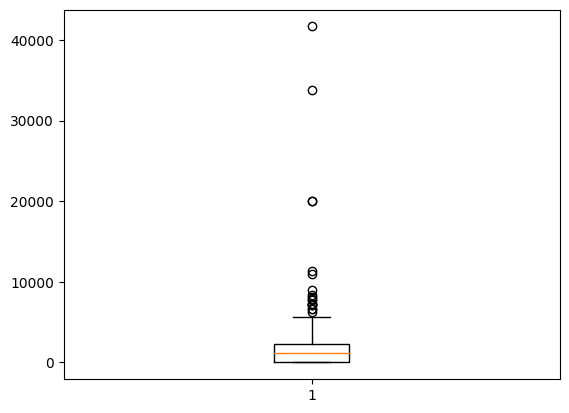

In [35]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [49]:
q1 = data['CoapplicantIncome'].quantile(0.25)
q2 = data['CoapplicantIncome'].quantile(0.5)
q3 = data['CoapplicantIncome'].quantile(0.75)

In [50]:
iqr = q3-q1

In [51]:
up_limit = q3+(1.5*iqr)
low_limit = q1-(1.5*iqr)

In [52]:
print(up_limit,low_limit)

5743.125 -3445.875


In [53]:
data.shape

(614, 13)

In [54]:
data[(data['CoapplicantIncome']>up_limit)|(data['CoapplicantIncome']<low_limit)].index

Int64Index([  9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
            506, 513, 523, 581, 600],
           dtype='int64')

In [55]:
data.drop([9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
            506, 513, 523, 581, 600],inplace=True)

In [56]:
data.shape

(596, 13)